<a href="https://colab.research.google.com/github/nudojacopo/thesis/blob/main/src/EDA/EDA_draw/draw_number_of_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

Cloning into 'thesis'...
remote: Enumerating objects: 1417, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 1417 (delta 85), reused 39 (delta 22), pack-reused 1273
Receiving objects: 100% (1417/1417), 65.55 MiB | 13.76 MiB/s, done.
Resolving deltas: 100% (906/906), done.
Updating files: 100% (65/65), done.
Mounted at /content/drive


In [2]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_PRO.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_news_PRO.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_PRO.csv')
gb=pd.read_csv('/content/drive/MyDrive/thesis/data/gab/gab_PRO.csv')

In [4]:
fb = fb[fb['temporal_distance_birth_h'] < 100].copy()
fb['temporal_distance_birth_base_100h'] = fb['temporal_distance_birth_h'] / 100

rd = rd[rd['temporal_distance_birth_h'] < 100].copy()
rd['temporal_distance_birth_base_100h'] = rd['temporal_distance_birth_h'] / 100

vo = vo[vo['temporal_distance_birth_h'] < 100].copy()
vo['temporal_distance_birth_base_100h'] = vo['temporal_distance_birth_h'] / 100

gb = gb[gb['temporal_distance_birth_h'] < 100].copy()
gb['temporal_distance_birth_base_100h'] = gb['temporal_distance_birth_h'] / 100



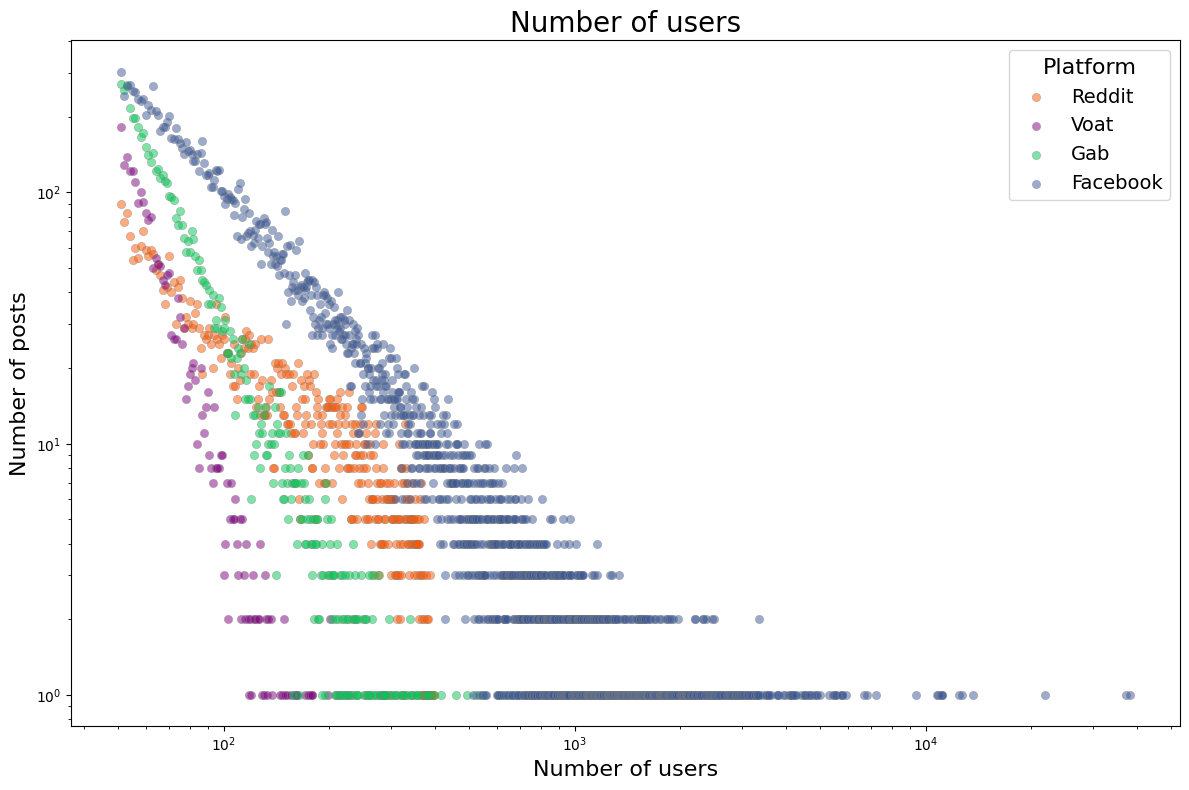

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define colors
reddit_color = '#FF5700'
voat_color = '#800080'
facebook_color = '#3b5998'
gab_color = '#00c853'

# Group by 'post_id' and count unique 'user_id' for each platform
users_fb = fb.groupby('post_id')['user_id'].nunique().reset_index()
users_rd = rd.groupby('post_id')['user_id'].nunique().reset_index()
users_gb = gb.groupby('post_id')['user_id'].nunique().reset_index()
users_vo = vo.groupby('post_id')['user_id'].nunique().reset_index()

# Rename columns
users_fb.columns = ['post_id', 'user_count']
users_rd.columns = ['post_id', 'user_count']
users_gb.columns = ['post_id', 'user_count']
users_vo.columns = ['post_id', 'user_count']

# Filter to include only posts with more than 50 unique users
users_fb = users_fb[users_fb['user_count'] > 50]
users_rd = users_rd[users_rd['user_count'] > 50]
users_gb = users_gb[users_gb['user_count'] > 50]
users_vo = users_vo[users_vo['user_count'] > 50]

# Count the number of posts with a specific number of unique users
post_count_fb = users_fb.groupby('user_count').size().reset_index(name='post_count')
post_count_rd = users_rd.groupby('user_count').size().reset_index(name='post_count')
post_count_gb = users_gb.groupby('user_count').size().reset_index(name='post_count')
post_count_vo = users_vo.groupby('user_count').size().reset_index(name='post_count')

# Create the scatter plot with log-log scale
plt.figure(figsize=(12, 8))

# Scatter plot for each platform with customized colors and transparency
sns.scatterplot(data=post_count_rd, x='user_count', y='post_count', alpha=0.5, label='Reddit', color=reddit_color, edgecolor='gray')
sns.scatterplot(data=post_count_vo, x='user_count', y='post_count', alpha=0.5, label='Voat', color=voat_color, edgecolor='gray')
sns.scatterplot(data=post_count_gb, x='user_count', y='post_count', alpha=0.5, label='Gab', color=gab_color, edgecolor='gray')
sns.scatterplot(data=post_count_fb, x='user_count', y='post_count', alpha=0.5, label='Facebook', color=facebook_color, edgecolor='gray')

# Set the axes to log scale
plt.xscale('log')
plt.yscale('log')

# Set titles and labels with increased font sizes
plt.title('Number of users', fontsize=20)
plt.xlabel('Number of users', fontsize=16)
plt.ylabel('Number of posts', fontsize=16)

# Remove the grid
plt.grid(False)

# Add the legend with increased font size
plt.legend(title='Platform', fontsize=14, title_fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()
